In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLO_DETECTION

/content/drive/MyDrive/YOLO_DETECTION


In [ ]:
model = YOLO('yolov8s.pt')  # Model selection

# Train the model
model.train(
    data='data.yaml',           # Path to data.yaml file
    epochs=50,                  # Number of epochs to train
    imgsz=256,                  # Image size
    plots=True,                 # Plotting
)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cpu CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=256, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, 

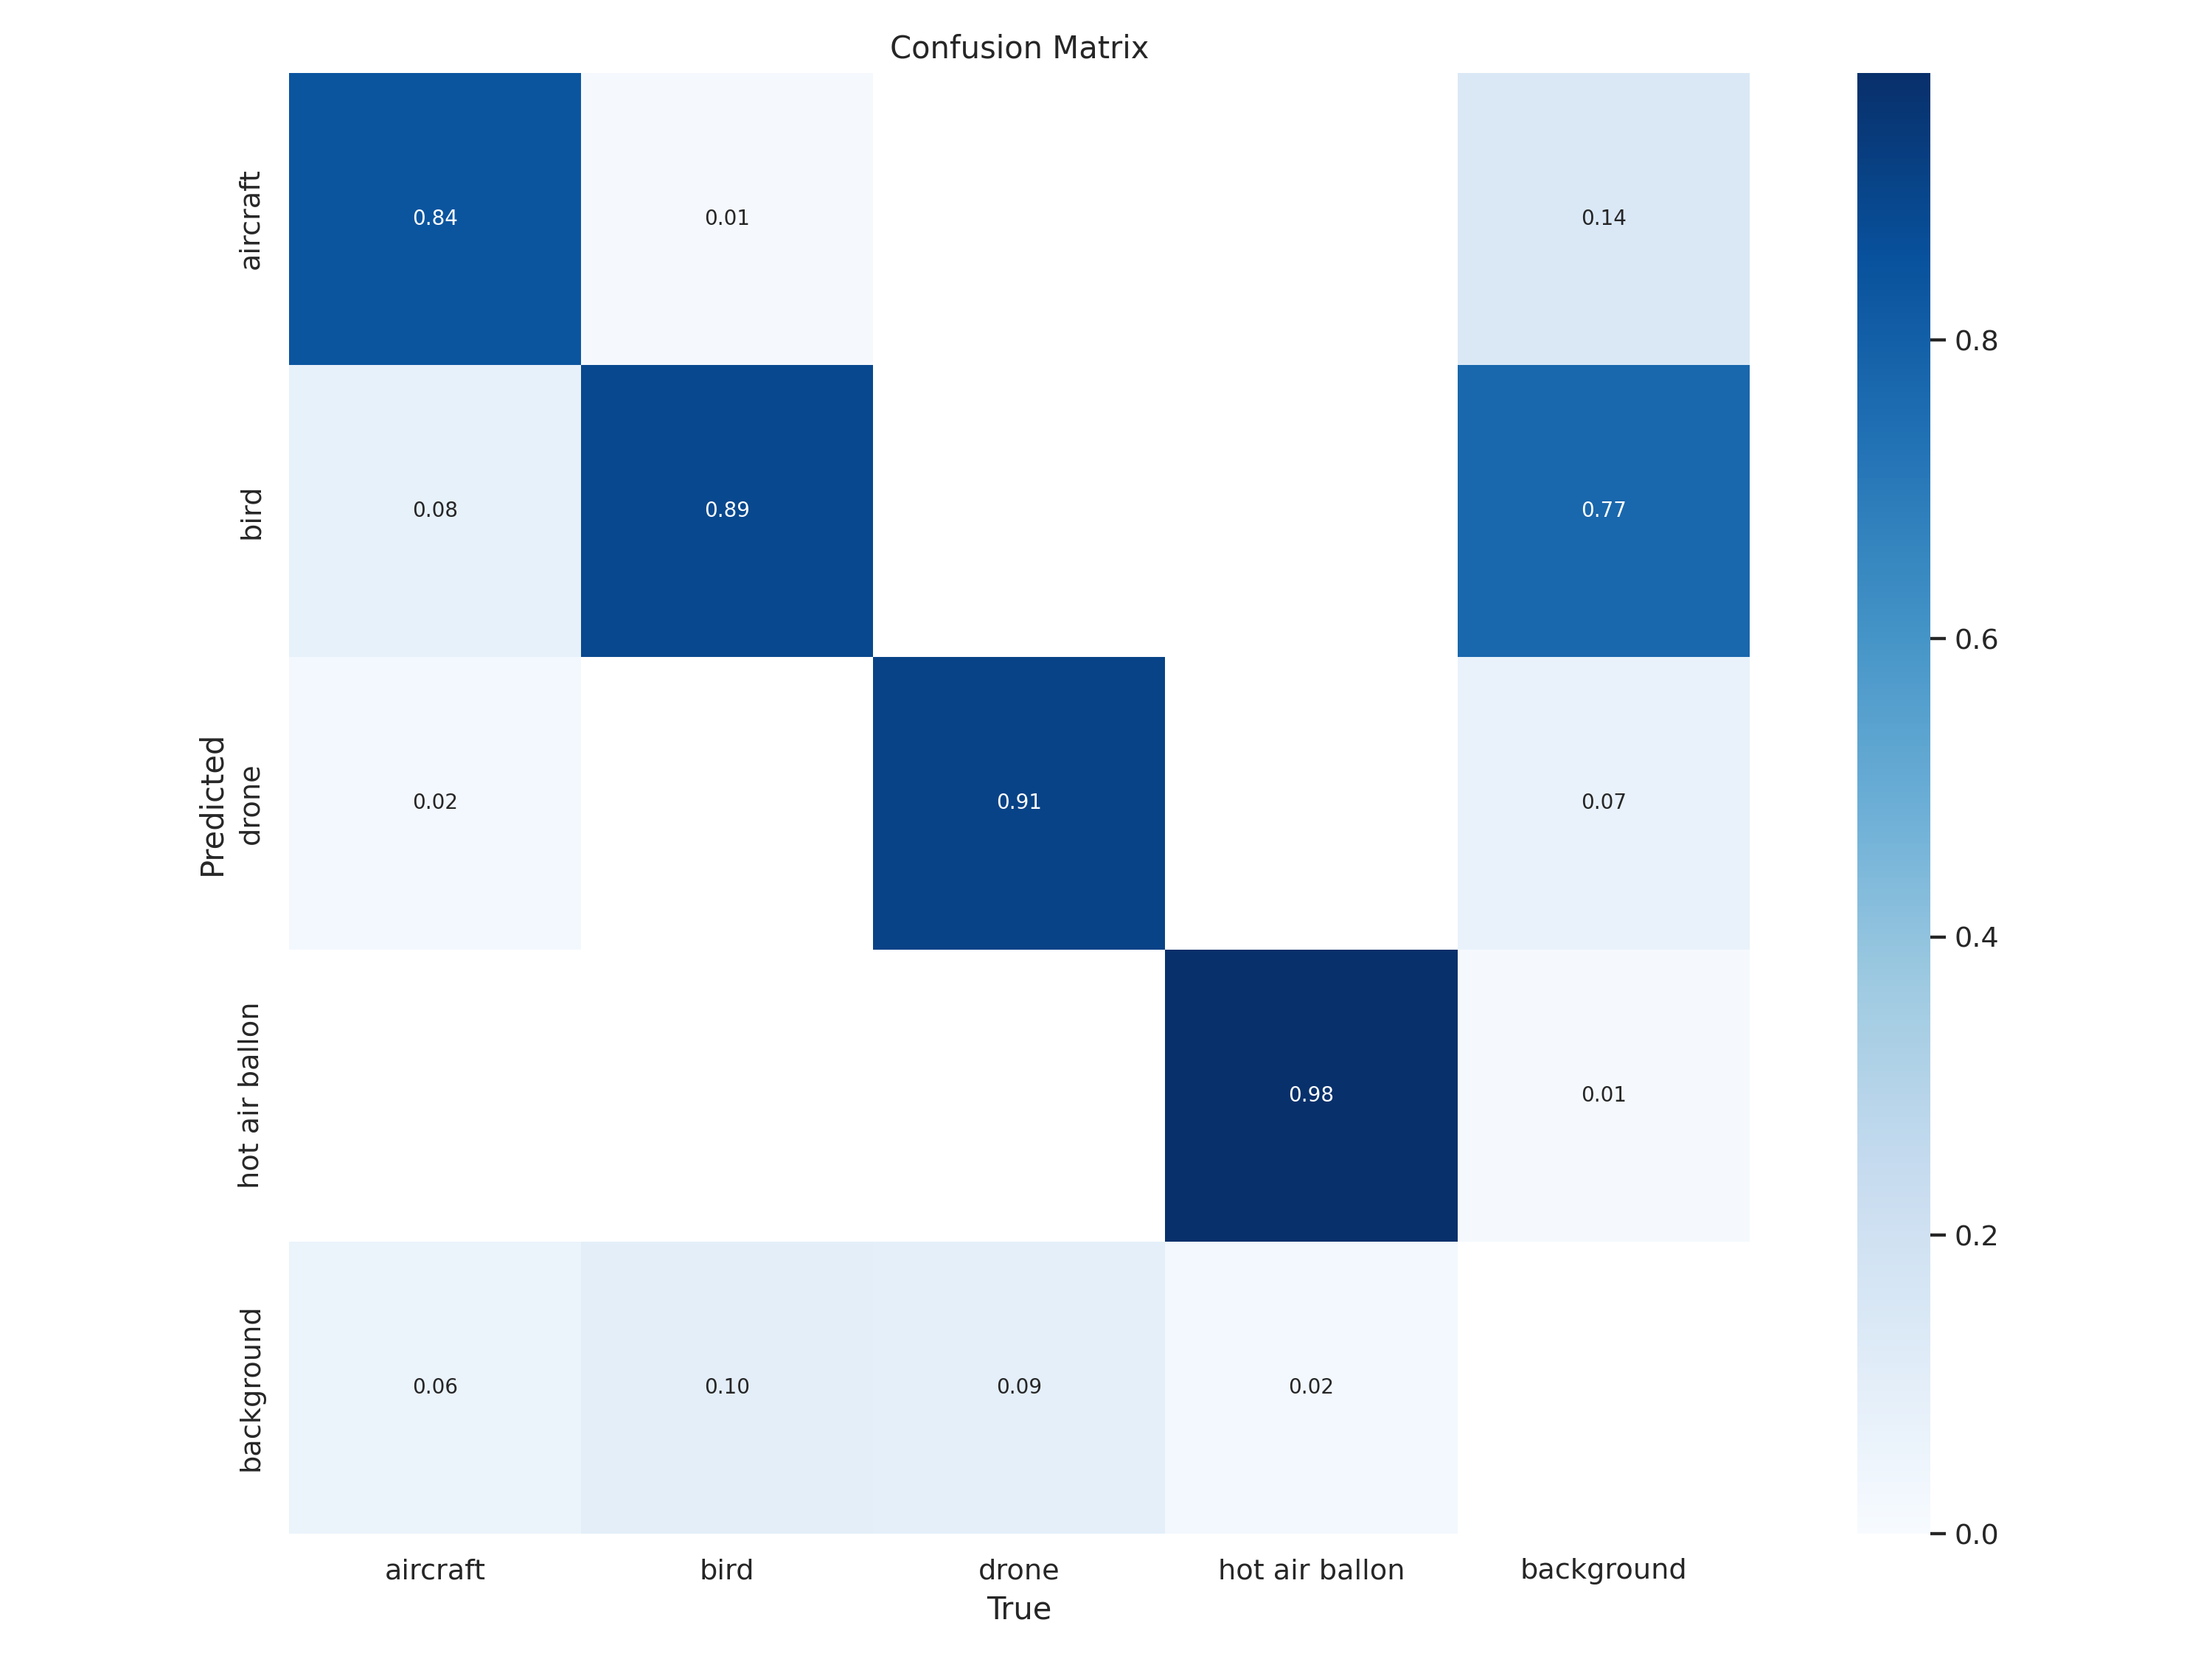

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

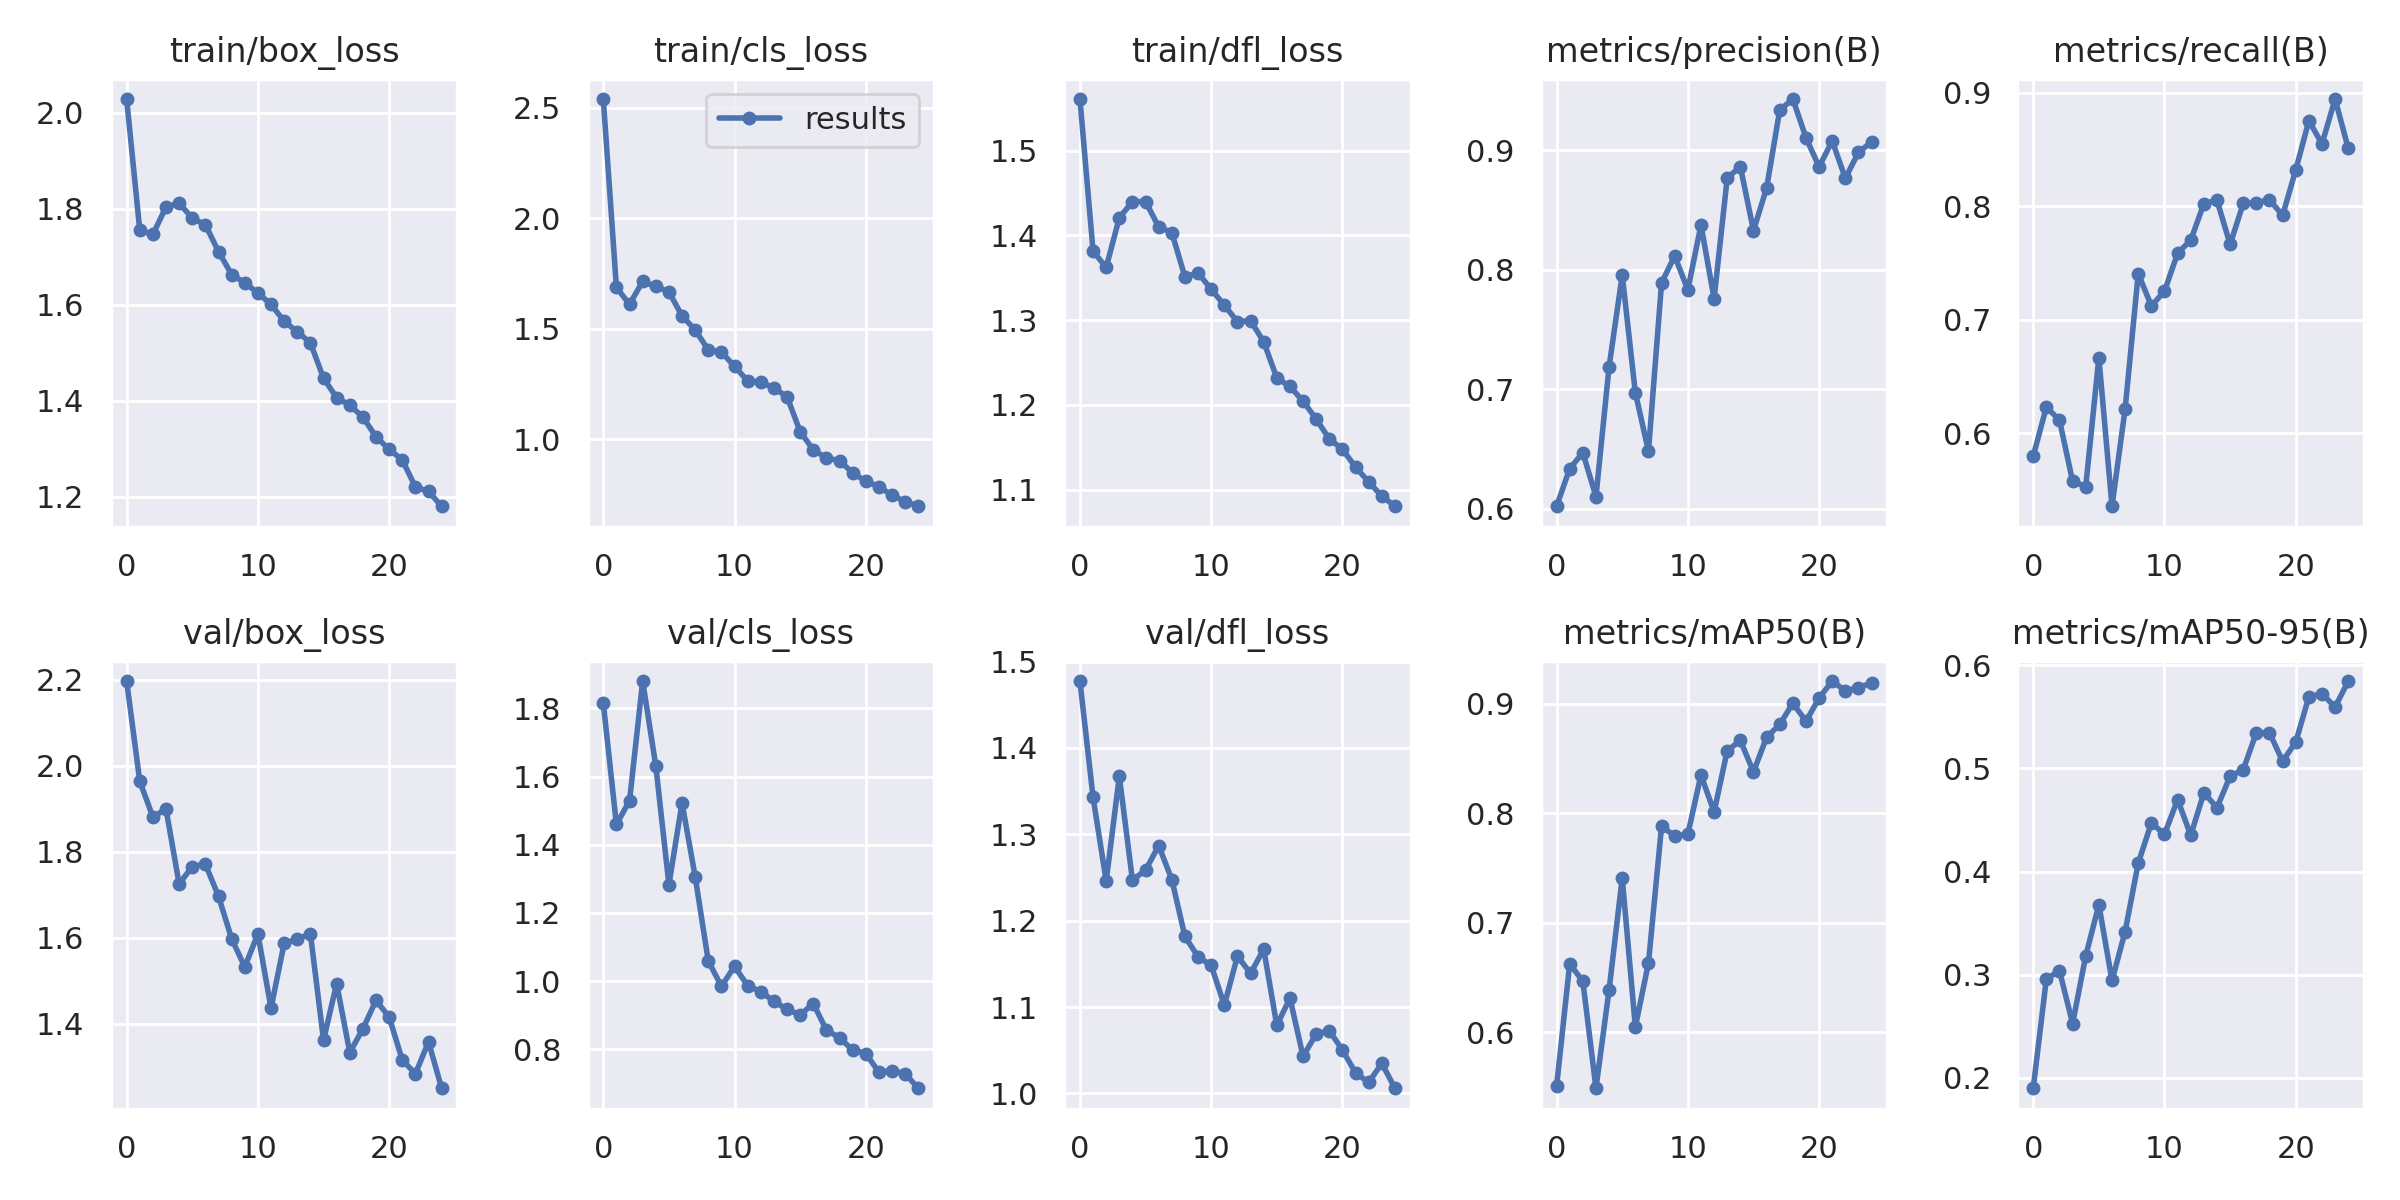

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

In [ ]:
# Load the trained model
best_model = YOLO('/content/drive/MyDrive/YOLO_DETECTION/runs/detect/train/weights/best.pt')

# Perform detection on images
results = best_model.predict(
    source='/content/drive/MyDrive/YOLO_DETECTION/dataset2/images/test',  # Path to your validation images or a single image
    conf=0.5,                      # Confidence threshold for detection
    save=True,                     # Save the results to disk
    save_txt=True,                 # Save results in text format
    save_conf=True                 # Save confidence scores
)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict2
294 labels saved to runs/detect/predict2/labels


Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/1.jpeg: 192x224 2 Goggless, 3 Glovess, 14.6ms
image 2/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/10.jpeg: 160x224 2 Glovess, 14.5ms
image 3/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/11.jpeg: 224x224 3 Glovess, 10.4ms
image 4/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/12.jpeg: 192x224 3 Glovess, 12.3ms
image 5/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/13.jpeg: 128x224 1 Gloves, 14.6ms
image 6/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/14(1).jpeg: 224x224 10.1ms
image 7/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/14.jpg: 192x224 2 Helmets, 1 Goggles, 1 Gloves, 9.5ms
image 8/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/15.jpeg: 224x2

**NOTE:** Let's take a look at few results.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import the alternative display function
from ultralytics import YOLO

# Load the trained model
best_model = YOLO('/content/drive/MyDrive/YOLO_DETECTION/runs/detect/train/weights/best.pt')

# Open the video file
video_path = '/content/drive/MyDrive/YOLO_DETECTION/videos/Test_videos/drones1.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Define the codec and create a VideoWriter object to save the output video
output_path = '/content/drive/MyDrive/YOLO_DETECTION/videos/Exports/drones1.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run the detection on the frame
    results = best_model.predict(source=frame, conf=0.5)

    # Extract bounding boxes and class labels
    for box in results[0].boxes:
        # Get the coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        # Get the class name
        class_name = best_model.names[int(box.cls[0])]
        # Draw the bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Put the class name text
        cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

    # Display the frame with detections (optional)
    # cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

print(f"Detection completed. Output saved to {output_path}")


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cpu CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


Detection completed. Output saved to /content/drive/MyDrive/YOLO_DETECTION/videos/Exports/drones1.mp4


In [ ]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Load the trained model
best_model = YOLO('/content/drive/MyDrive/YOLO_DETECTION/runs/detect/train/weights/best.pt')

# Initialize Deep SORT tracker
tracker = DeepSort(max_age=70, n_init=3, nn_budget=100)

# Open the video file
video_path = '/content/drive/MyDrive/YOLO_DETECTION/videos/Test_videos/drones2.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Define the codec and create a VideoWriter object to save the output video
output_path = '/content/drive/MyDrive/YOLO_DETECTION/videos/Tracked/drones2.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run the detection on the frame
    results = best_model.predict(source=frame, conf=0.5)

    detections = []
    for box in results[0].boxes:
        # Get the coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Debugging: Print coordinates to check their values
        print(f'Detected box coordinates: x1={x1}, y1={y1}, x2={x2}, y2={y2}')

        # Get the class name
        class_name = best_model.names[int(box.cls[0])]
        # Detection format for Deep SORT
        detections.append(([x1, y1, x2, y2], box.conf[0], class_name))

    # Update tracker with current frame detections
    tracks = tracker.update_tracks(detections, frame=frame)

    # Draw the bounding boxes and track IDs
    for track in tracks:
        if not track.is_confirmed() or track.time_since_update > 1:
            continue
        track_id = track.track_id
        ltrb = track.to_ltrb()
        x1, y1, x2, y2 = map(int, ltrb)
        class_name = track.det_class  # Class name is available here

        # Draw the bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Put the class name and track ID text
        cv2.putText(frame, f'{class_name} ID: {track_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

    # Display the frame with detections (optional)
    # cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

print(f"Detection and tracking completed. Output saved to {output_path}")


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


Detected box coordinates: x1=238, y1=164, x2=1163, y2=518
Detected box coordinates: x1=248, y1=169, x2=1156, y2=517
Detected box coordinates: x1=241, y1=162, x2=1172, y2=519
Detected box coordinates: x1=255, y1=164, x2=1152, y2=519
Detected box coordinates: x1=256, y1=155, x2=1131, y2=521
Detected box coordinates: x1=254, y1=158, x2=1122, y2=522
Detected box coordinates: x1=259, y1=149, x2=1151, y2=520
Detected box coordinates: x1=253, y1=151, x2=1185, y2=517
Detected box coordinates: x1=255, y1=149, x2=1156, y2=517
Detected box coordinates: x1=257, y1=153, x2=1164, y2=516
Detected box coordinates: x1=254, y1=149, x2=1169, y2=515
Detected box coordinates: x1=262, y1=148, x2=1130, y2=518
Detected box coordinates: x1=258, y1=143, x2=1126, y2=519
Detected box coordinates: x1=255, y1=145, x2=1145, y2=516
Detected box coordinates: x1=257, y1=147, x2=1161, y2=510
Detected box coordinates: x1=250, y1=147, x2=1153, y2=514
Detected box coordinates: x1=250, y1=144, x2=1154, y2=508
Detected box c